In [72]:
# Importing libraries needed

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#Importing dataset

food_data = pd.read_csv("UN_food_and_Agriculture_data.csv", encoding = "latin-1")
food_data.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [74]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [75]:
# What is the total sum of Animal Fat produced in 2014 and 2017 respectively?
animal_fat_only = food_data.loc[food_data["Item"] == "Animal fats"]

animal_fat_only.groupby("Item")[["Y2014", "Y2017"]].sum()


,Y2014,Y2017
Item,,
Animal fats,209460.54,269617.53


In [76]:
# What is the mean and standard deviation across the whole dataset for the year 2015 to 3 decimal places?

mean= food_data["Y2015"].mean()
sd = food_data["Y2015"].std()

print(mean, sd, sep = "\n")

135.23596649549626
1603.4039839425013


In [77]:
# What is the total number and percentage of missing data in 2016 to 2 decimal places?

total_missn_val_2016 = food_data["Y2016"].isnull().sum()


# get percentage, use the shape method and subset by the first index (0), to get the total number of rows 
# and divide total missing value for 2016 by total number of rows then multiply by 100

percent_missn_val_2016= round((total_missn_val_2016/(food_data.shape[0]) * 100), 2)

#let's print the two values

print(total_missn_val_2016, percent_missn_val_2016, sep = "\n")

1535
2.52


,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Area Code,1.000000,-0.005159,-0.000209,0.006164,0.005472,0.005247,0.005006,0.005665
Item Code,-0.005159,1.000000,-0.024683,0.021722,0.020857,0.020109,0.021494,0.021314
Element Code,-0.000209,-0.024683,1.000000,0.024457,0.023889,0.023444,0.024254,0.024279
Y2014,0.006164,0.021722,0.024457,1.000000,0.994647,0.996081,0.995230,0.994872
Y2015,0.005472,0.020857,0.023889,0.994647,1.000000,0.995739,0.988048,0.988208
Y2016,0.005247,0.020109,0.023444,0.996081,0.995739,1.000000,0.992785,0.992757
Y2017,0.005006,0.021494,0.024254,0.995230,0.988048,0.992785,1.000000,0.998103
Y2018,0.005665,0.021314,0.024279,0.994872,0.988208,0.992757,0.998103,1.000000


<function matplotlib.pyplot.show>

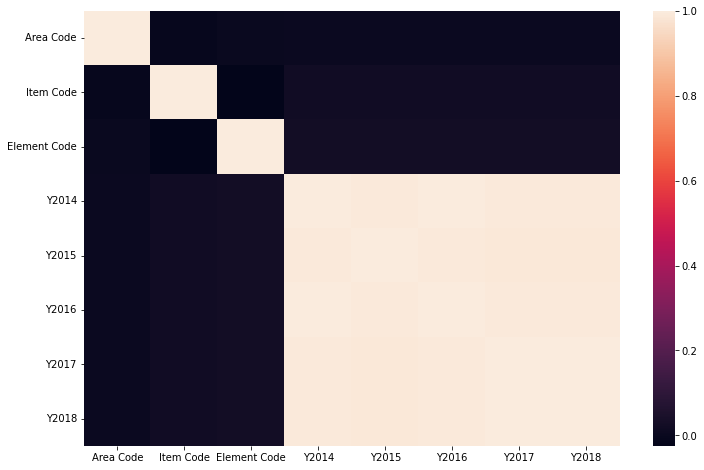

In [78]:
# Which year had the highest correlation with ‘Element Code’? 

food_data_corr = food_data.corr()

display(food_data_corr)

print(sep = "\n")

fig = plt.figure(figsize = (12, 8))

sns.heatmap(food_data_corr)

plt.show


The chart does not reveal much as the numbers are really close. 

However, from the table, the year most correlated is 2014, recording 0.024457, which is higher than that of the other years

In [79]:
# What year has the highest sum of Import Quantity?
import_quant_only = food_data.loc[food_data["Element"] == "Import Quantity"]

import_quant_only.groupby("Element")[["Y2014", "Y2015", "Y2016", "Y2017", "Y2018"]].sum()


,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,
Import Quantity,274144.48,267018.46,286582.78,294559.09,287997.09


2017 has the highest sum of **Import Quantity**

In [80]:
# What is the total number of the sum of Production in 2014?

productn_only = food_data.loc[food_data["Element"] == "Production"]
pd.DataFrame(productn_only.groupby("Element")["Y2014"].sum())

,Y2014
Element,
Production,1931287.75


In [81]:
# Which of these elements had the highest sum in 2018?
# Food supply (k/cal/capita/day, Domestic supply quantity, Food supply quantity (kg/capita/yr), Import quantity

element_list1 = ["Food supply (kcal/capita/day)", "Domestic supply quantity", "Food supply quantity (kg/capita/yr)", "Import Quantity"]
some_elements1_2018 = food_data.loc[food_data["Element"].isin(element_list1)]

elements_grouped1 = some_elements1_2018.groupby("Element")["Y2018"].sum()
pd.DataFrame(elements_grouped1).sort_values("Y2018", ascending = False)

,Y2018
Element,
Domestic supply quantity,2161192.10
Food supply (kcal/capita/day),455261.00
Import Quantity,287997.09
Food supply quantity (kg/capita/yr),49056.85


Of the four elements, **Domestic supply quantity** had the highest sum in 2018

In [82]:
# Which of these elements had the 3rd lowest sum in 2018?
# Food supply quantity (kg/capita/yr), Protein supply quantity (g/capita/day), Seed, 
# Fat supply quantity (g/capita/day), Food supply (kcal/capita/day)

element_list2 = ["Food supply quantity (kg/capita/yr)", "Protein supply quantity (g/capita/day)", "Seed", "Fat supply quantity (g/capita/day)", "Food supply (kcal/capita/day)"]
some_elements2_2018 = food_data.loc[food_data["Element"].isin(element_list2)]

element_grouped2 = some_elements2_2018.groupby("Element")["Y2018"].sum()

pd.DataFrame(element_grouped2).sort_values("Y2018", ascending = True)

,Y2018
Element,
Fat supply quantity (g/capita/day),10258.69
Protein supply quantity (g/capita/day),11833.56
Seed,25263.14
Food supply quantity (kg/capita/yr),49056.85
Food supply (kcal/capita/day),455261.00


Of the five elements, Seed had the third lowest sum in 2018

In [83]:
# What is the total Import Quantity in Algeria in 2018?

algeria_only = food_data.loc[(food_data["Area"] == "Algeria") & (food_data["Element"] == "Import Quantity")]

pd.DataFrame(algeria_only.groupby("Element")["Y2018"].sum())

,Y2018
Element,
Import Quantity,36238.29


In [84]:
# What is the total number of unique countries in the dataset?

food_data["Area"].nunique()

49